# 📦 1. Imports and Setup

In [1]:
# Import essential libraries
import os  # For file and directory operations
import numpy as np  # Numerical operations (if needed later)
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced visualizations


# 📂 2. Load File Paths and Explore Dataset

In [2]:
# Define root folder path containing regional files
d0 = r'C:\Users\ajinv\Downloads\project6'

In [3]:
# List all regional files
list_region = os.listdir(d0)
list_region[:5]

['Alberni-Clayoquot.csv',
 'Bulkley-Nechako.csv',
 'Capital.csv',
 'Cariboo.csv',
 'Central Coast.csv']

In [4]:
# Locate a specific file in the list
list_region.index('Nanaimo.csv')

18

In [5]:
# Load a sample regional dataset (Nanaimo)
non = pd.read_csv(os.path.join(d0, list_region[18]))
non.head()

,year,Units Collected,Weight Collected (Tonnes)
0,2007,32136000,2441.2
1,2008,34274000,2823.4
2,2009,35586000,3309.8
3,2010,34453000,3574.2
4,2011,33365000,3319.5


In [6]:
# Load population dataset
pop = pd.read_csv(r"C:\Users\ajinv\Downloads\project6\total\population_estimates.csv")
pop.head()

,regional_district,year,population
0,British Columbia,1986,3003621
1,British Columbia,1987,3048651
2,British Columbia,1988,3114761
3,British Columbia,1989,3196725
4,British Columbia,1990,3292111


# 📊 3. Data Exploration & Matching Regional Names

In [7]:
non.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       11 non-null     int64  
 1   Units Collected            11 non-null     int64  
 2   Weight Collected (Tonnes)  11 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 396.0 bytes


In [8]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   regional_district  990 non-null    object
 1   year               990 non-null    int64 
 2   population         990 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.3+ KB


In [9]:
pop['regional_district'].value_counts()[:4]

regional_district
British Columbia    33
East Kootenay       33
Stikine             33
Peace River         33
Name: count, dtype: int64

In [10]:
pop['regional_district'].value_counts().index

Index(['British Columbia', 'East Kootenay', 'Stikine', 'Peace River',
       'Fraser-Fort George', 'Bulkley-Nechako', 'Kitimat-Stikine',
       'North Coast', 'Central Coast', 'Mount Waddington', 'Cariboo',
       'Columbia-Shuswap', 'North Okanagan', 'Central Okanagan',
       'Thompson-Nicola', 'Squamish-Lillooet', 'Sunshine Coast',
       'Powell River', 'Comox Valley', 'Strathcona', 'Alberni-Clayoquot',
       'Nanaimo', 'Cowichan Valley', 'Capital', 'Metro Vancouver',
       'Fraser Valley', 'Okanagan-Similkameen', 'Kootenay-Boundary',
       'Central Kootenay', 'Northern Rockies'],
      dtype='object', name='regional_district')

In [11]:
list_region2 = [i.split('.')[0] for i in list_region]
list_region2[:4]

['Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital', 'Cariboo']

In [12]:
sum([1 for i in list_region2 if i in pop['regional_district'].value_counts().index])

26

In [13]:
[i for i in list_region2 if i not in pop['regional_district'].value_counts().index]

['Comox-Strathcona', 'Comox', 'Skeena-Queen Charlotte', 'total']

In [14]:
sorted(pop['regional_district'].unique())

['Alberni-Clayoquot',
 'British Columbia',
 'Bulkley-Nechako',
 'Capital',
 'Cariboo',
 'Central Coast',
 'Central Kootenay',
 'Central Okanagan',
 'Columbia-Shuswap',
 'Comox Valley',
 'Cowichan Valley',
 'East Kootenay',
 'Fraser Valley',
 'Fraser-Fort George',
 'Kitimat-Stikine',
 'Kootenay-Boundary',
 'Metro Vancouver',
 'Mount Waddington',
 'Nanaimo',
 'North Coast',
 'North Okanagan',
 'Northern Rockies',
 'Okanagan-Similkameen',
 'Peace River',
 'Powell River',
 'Squamish-Lillooet',
 'Stikine',
 'Strathcona',
 'Sunshine Coast',
 'Thompson-Nicola']

In [15]:
list_region_name = [i for i in list_region2 if i in pop['regional_district'].value_counts().index]
list_region_csv = [i + '.csv' for i in list_region_name]

# 🧪 4. Filter and Join Sample Data

In [16]:
file_path = os.path.join(d0, list_region_csv[16])
print(os.path.exists(file_path))

True


In [17]:
non_year = pd.read_csv(os.path.join(d0, list_region_csv[16]))['year'].unique()
non_year

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [18]:
pop1 = pop[pop['year'].isin(non_year)]

In [19]:
pop_non = pop1[pop1['regional_district'] == list_region_name[16]]

In [20]:
pd.merge(pop_non, pd.read_csv(os.path.join(d0 , list_region_csv[16])), on='year', how='inner')

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)
0,Nanaimo,2007,142207,32136000,2441.2
1,Nanaimo,2008,144547,34274000,2823.4
2,Nanaimo,2009,146271,35586000,3309.8
3,Nanaimo,2010,147464,34453000,3574.2
4,Nanaimo,2011,148877,33365000,3319.5
5,Nanaimo,2012,150017,32918000,3287.6
6,Nanaimo,2013,152158,33033000,3315.6
7,Nanaimo,2014,155118,33487000,-99999.0
8,Nanaimo,2015,158143,35765000,3508.7
9,Nanaimo,2016,162617,35632000,3505.0


# 🔁 5. Pivot, Merge and Append All Regions

In [21]:
df1 = pd.pivot_table(
    data=pd.read_csv(os.path.join(d0, list_region_csv[0])),
    index='year',
    columns='measure',
    values='value',
    aggfunc='sum'
)

In [22]:
pop_sample = pop1[pop1['regional_district'] == list_region_name[0]]
final = pd.merge(pop_sample, df1, on='year', how='inner')

In [23]:
for i in list_region_name[1:]:
    file_path = os.path.join(d0, i + '.csv')
    
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    df_pivot = pd.read_csv(file_path)
    
    if 'measure' in df_pivot.columns:
        df_pivot = pd.pivot_table(data=df_pivot, index='year', columns='measure', values='value', aggfunc='sum')

    pop_sample = pop1[pop1['regional_district'] == i]
    final = pd.concat([final, pd.merge(pop_sample, df_pivot, how='inner', on='year')], axis=0)

In [24]:
final2 = final.reset_index().iloc[:, 1:]

# 📉 6. Cleaning and Visualizing the Data

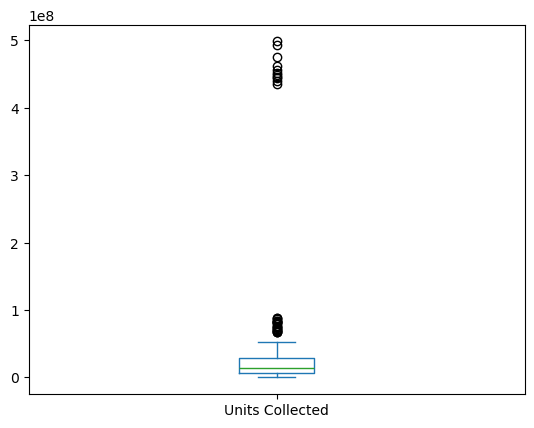

In [25]:
final2['Units Collected'].plot(kind='box')
plt.show()

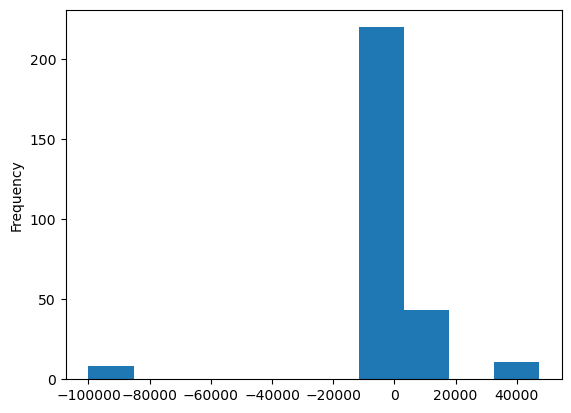

In [26]:
final2['Weight Collected (Tonnes)'].plot(kind='hist');

In [27]:
index_drop = final2[final2['Weight Collected (Tonnes)'] < 0].index
final3 = final2.drop(index_drop, axis=0)

# 📈 7. Compute Per Capita & Plot by Region

In [28]:
final3["per_capita_weight"] = final2["Weight Collected (Tonnes)"] / final2["population"]

C:\Users\ajinv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ajinv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


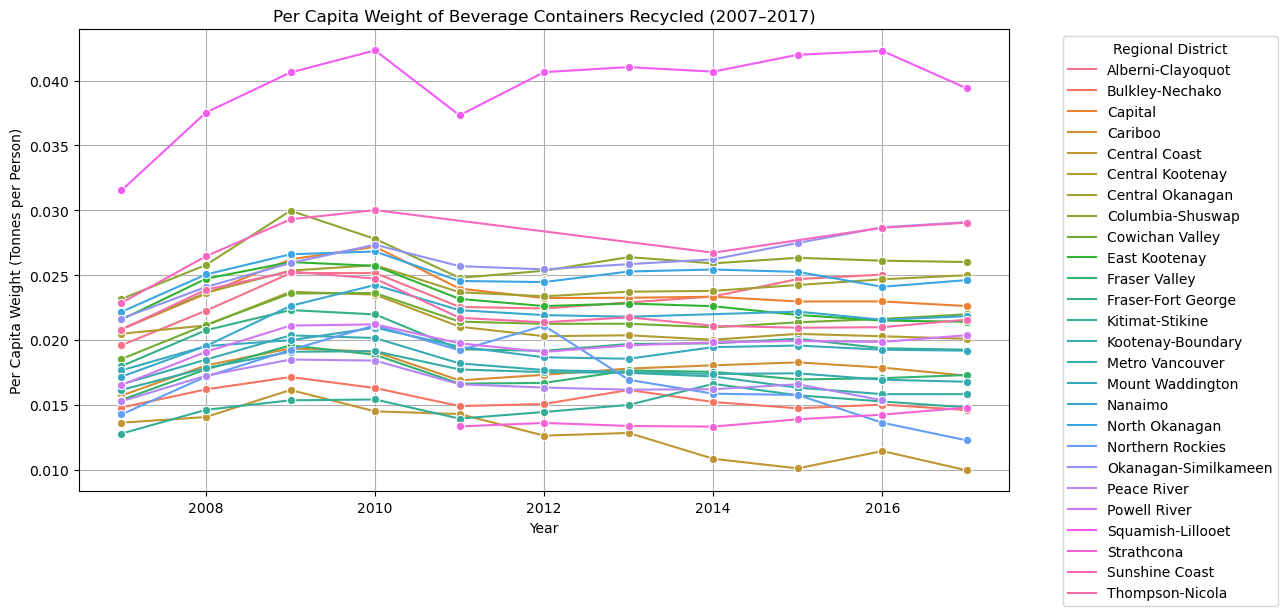

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=final3, x="year", y="per_capita_weight", hue="regional_district", marker="o")
plt.xlabel("Year")
plt.ylabel("Per Capita Weight (Tonnes per Person)")
plt.title("Per Capita Weight of Beverage Containers Recycled (2007–2017)")
plt.legend(title="Regional District", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 📊 8. British Columbia Summary Over Time

In [30]:
df_bc = final3.groupby("year").agg({
    "Weight Collected (Tonnes)": "sum",
    "population": "sum"
}).reset_index()

df_bc["per_capita_weight"] = df_bc["Weight Collected (Tonnes)"] / df_bc["population"]
print(df_bc)

    year  Weight Collected (Tonnes)  population  per_capita_weight
0   2007                    74039.9     4166362           0.017771
1   2008                    84451.3     4223079           0.019998
2   2009                    94060.1     4283532           0.021959
3   2010                    95124.3     4338344           0.021926
4   2011                    86120.2     4388823           0.019623
5   2012                    85754.3     4452380           0.019260
6   2013                    86546.0     4482864           0.019306
7   2014                    85717.3     4465207           0.019197
8   2015                    89809.9     4657663           0.019282
9   2016                    90836.5     4770028           0.019043
10  2017                    89823.7     4733659           0.018976
